In [1]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

for i in range(10):
    
    print('---------' + str(i) + '------------')
    
    MAX_EPISODE = 1000
    MAX_EPISODE_LEN = 200

    NUM_T = 1
    NUM_R = 4
    SIGMA2 = 1e-9

    t_factor = 0.9
    noise_sigma = 0.12

    config = {'state_dim':3, 'action_dim':2};
    train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                    'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                    'random_seed':int(time.clock()*1000%1000), 'noise_sigma':noise_sigma, 'sigma2':SIGMA2}
    user_config = [{'id':'1', 'model':'AR', 'num_r':NUM_R, 'rate':3.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000}]

    print(user_config)

    # 1. include all user in the system according to the user_config
    user_list = [];
    for info in user_config:
        info.update(config)
        user_list.append(MecTermGD(info, train_config, 'local'))
        print('Initialization OK!----> user ' + info['id'])

    # 2. create the simulation env
    env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)

    # #Create a saver object which will save all the variables
    # saver = tf.train.Saver() 

    res_r = []
    res_p = []
    res_b = []
    res_o = []
    res_d = []
    # 3. start to explore for each episode
    for i in range(MAX_EPISODE):

        cur_init_ds_ep = env.reset()

        cur_r_ep = np.zeros(len(user_list))
        cur_p_ep = np.zeros(len(user_list))
        cur_op_ep = np.zeros(len(user_list))
        cur_ts_ep = np.zeros(len(user_list))
        cur_ps_ep = np.zeros(len(user_list))
        cur_rs_ep = np.zeros(len(user_list))
        cur_ds_ep = np.zeros(len(user_list))
        cur_ch_ep = np.zeros(len(user_list))
        cur_of_ep = np.zeros(len(user_list))

        for j in range(MAX_EPISODE_LEN):
            
            # first try to transmit from current state
            [cur_r, done, cur_p, cur_op, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()

            cur_r_ep += cur_r
            cur_p_ep += cur_p
            cur_op_ep += cur_op
            cur_ts_ep += cur_ts
            cur_ps_ep += cur_ps
            cur_rs_ep += cur_rs
            cur_ds_ep += cur_ds
            cur_ch_ep += cur_ch
            cur_of_ep += cur_of


            if done:
                res_r.append(cur_r_ep/MAX_EPISODE_LEN)
                res_p.append(cur_p_ep/MAX_EPISODE_LEN)
                res_b.append(cur_ds_ep/MAX_EPISODE_LEN)
                res_o.append(cur_of_ep/MAX_EPISODE_LEN)
                res_d.append(cur_ds)
                print('%d:r:%s,p:%s,op:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s,rbuf:%s' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_op_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep, cur_ds))

    name = 't_nB_LGD/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
    np.savez(name, res_r, res_p, res_b, res_o, res_d)


---------0------------
[{'penalty': 1000, 'num_r': 4, 'rate': 3.0, 'action_bound': 2, 'data_buf_size': 100, 'model': 'AR', 'id': '1', 't_factor': 0.9, 'dis': 100}]
Initialization OK!----> user 1
0:r:[-17.93885667],p:[1.9577412],op:[0.],tr:[0.92233769],pr:[2.11016231],rev:[2.94],dbuf:[3.19185835],ch:[4.06891956],ibuf:[18.5],rbuf:[9.99200722e-16]
1:r:[-17.23694542],p:[1.88037769],op:[0.],tr:[0.91952105],pr:[2.08797895],rev:[3.005],dbuf:[3.13546239],ch:[3.65503272],ibuf:[4.5],rbuf:[4.]
2:r:[-16.02658865],p:[1.74784217],op:[0.],tr:[0.78874899],pr:[2.04588934],rev:[2.78],dbuf:[2.96009154],ch:[4.04180888],ibuf:[15.0],rbuf:[4.07233389]
3:r:[-17.77168306],p:[1.92882148],op:[0.],tr:[0.98262234],pr:[2.08237766],rev:[2.915],dbuf:[4.12289744],ch:[4.21193868],ibuf:[36.0],rbuf:[6.]
4:r:[-16.85164209],p:[1.83879359],op:[0.],tr:[0.85735988],pr:[2.05590405],rev:[2.93],dbuf:[3.02499772],ch:[3.7430678],ibuf:[0.5],rbuf:[3.84721298]
5:r:[-16.94493885],p:[1.84545104],op:[0.],tr:[0.94128899],pr:[2.04371101],

59:r:[-19.19936325],p:[2.0859845],op:[0.],tr:[1.16835062],pr:[2.16414938],rev:[3.12],dbuf:[4.25502789],ch:[4.02209798],ibuf:[43.5],rbuf:[1.]
60:r:[-18.79900394],p:[2.04428048],op:[0.],tr:[1.01071226],pr:[2.11678774],rev:[3.02],dbuf:[4.00479617],ch:[3.68241556],ibuf:[26.5],rbuf:[5.]
61:r:[-20.997345],p:[2.27597372],op:[0.],tr:[1.13358576],pr:[2.13641424],rev:[3.055],dbuf:[5.13581561],ch:[3.35226664],ibuf:[44.0],rbuf:[1.]
62:r:[-18.18430939],p:[1.98513785],op:[0.],tr:[0.94914695],pr:[2.07335305],rev:[2.99],dbuf:[3.1806872],ch:[3.67084459],ibuf:[9.5],rbuf:[3.]
63:r:[-18.13869284],p:[1.97703418],op:[0.],tr:[0.9638854],pr:[2.0911146],rev:[2.95],dbuf:[3.45385254],ch:[3.52461461],ibuf:[27.0],rbuf:[6.]
64:r:[-19.13438452],p:[2.07015482],op:[0.],tr:[1.1707516],pr:[2.1417484],rev:[3.09],dbuf:[5.02991133],ch:[5.02231084],ibuf:[45.5],rbuf:[1.]
65:r:[-18.9777136],p:[2.07138954],op:[0.],tr:[0.99346338],pr:[2.14653662],rev:[3.07],dbuf:[3.35207727],ch:[3.5972779],ibuf:[18.0],rbuf:[4.]
66:r:[-20.500880

119:r:[-18.97499222],p:[2.0608944],op:[0.],tr:[1.06934015],pr:[2.17065985],rev:[3.05],dbuf:[4.26942662],ch:[3.99175045],ibuf:[41.0],rbuf:[3.]
120:r:[-19.33288903],p:[2.10636165],op:[0.],tr:[1.0327362],pr:[2.1397638],rev:[3.01],dbuf:[3.75634203],ch:[3.49127407],ibuf:[36.5],rbuf:[4.]
121:r:[-17.04515663],p:[1.85925953],op:[0.],tr:[0.89398464],pr:[2.07851536],rev:[2.96],dbuf:[3.11820875],ch:[5.43381673],ibuf:[7.5],rbuf:[5.]
122:r:[-17.94532717],p:[1.95918101],op:[0.],tr:[0.88147339],pr:[2.08601066],rev:[2.95],dbuf:[3.12698115],ch:[3.37032011],ibuf:[6.5],rbuf:[3.00319043]
123:r:[-18.31888166],p:[1.99803546],op:[0.],tr:[1.08962373],pr:[2.12787627],rev:[3.22],dbuf:[3.36562542],ch:[4.60673849],ibuf:[1.5],rbuf:[2.]
124:r:[-18.17151314],p:[1.98004387],op:[0.],tr:[1.01332704],pr:[2.12417296],rev:[3.035],dbuf:[3.51118333],ch:[4.45385043],ibuf:[24.5],rbuf:[4.]
125:r:[-17.46943667],p:[1.90162708],op:[0.],tr:[0.99041317],pr:[2.04458683],rev:[2.905],dbuf:[3.54792955],ch:[4.6037629],ibuf:[28.0],rbuf:[

179:r:[-19.34861602],p:[2.10470409],op:[0.],tr:[1.06655612],pr:[2.12094388],rev:[3.05],dbuf:[4.06279203],ch:[3.92226291],ibuf:[30.5],rbuf:[3.]
180:r:[-19.11960326],p:[2.08345665],op:[0.],tr:[1.02253086],pr:[2.08246914],rev:[2.965],dbuf:[3.68493453],ch:[2.80672107],ibuf:[30.0],rbuf:[2.]
181:r:[-19.94655966],p:[2.16780682],op:[0.],tr:[1.24632654],pr:[2.17367346],rev:[3.25],dbuf:[4.36298281],ch:[4.37674831],ibuf:[39.0],rbuf:[5.]
182:r:[-18.07104889],p:[1.96970587],op:[0.],tr:[1.09157258],pr:[2.08592742],rev:[3.1],dbuf:[3.43696062],ch:[4.58390156],ibuf:[15.5],rbuf:[2.22044605e-15]
183:r:[-19.0267411],p:[2.07424227],op:[0.],tr:[1.02300181],pr:[2.09647119],rev:[3.075],dbuf:[3.58560661],ch:[4.68314482],ibuf:[9.5],rbuf:[0.60540008]
184:r:[-17.64263334],p:[1.91883946],op:[0.],tr:[0.9151188],pr:[2.0448812],rev:[2.82],dbuf:[3.73078197],ch:[3.98170984],ibuf:[32.0],rbuf:[4.]
185:r:[-19.98303904],p:[2.17025611],op:[0.],tr:[1.20199846],pr:[2.19050154],rev:[3.16],dbuf:[4.50734012],ch:[4.08020862],ibuf

239:r:[-17.14700499],p:[1.86702533],op:[0.],tr:[0.9754255],pr:[2.0895745],rev:[2.935],dbuf:[3.43776991],ch:[4.1899545],ibuf:[28.0],rbuf:[2.]
240:r:[-18.22993894],p:[1.9741998],op:[0.],tr:[1.03211914],pr:[2.09788086],rev:[2.91],dbuf:[4.62140694],ch:[5.17021939],ibuf:[47.0],rbuf:[3.]
241:r:[-19.81176555],p:[2.16223457],op:[0.],tr:[1.1047583],pr:[2.20304529],rev:[3.27],dbuf:[3.51654411],ch:[3.85386188],ibuf:[12.0],rbuf:[4.43928335]
242:r:[-19.6397266],p:[2.12552219],op:[0.],tr:[1.03958988],pr:[2.16541012],rev:[3.01],dbuf:[5.10026874],ch:[3.95752099],ibuf:[42.0],rbuf:[3.]
243:r:[-19.41822129],p:[2.09862187],op:[0.],tr:[1.05473002],pr:[2.18526998],rev:[3.01],dbuf:[5.30624462],ch:[3.86614674],ibuf:[49.0],rbuf:[3.]
244:r:[-18.83019461],p:[2.05064153],op:[0.],tr:[0.95590807],pr:[2.12909193],rev:[2.975],dbuf:[3.7442088],ch:[3.62911978],ibuf:[23.0],rbuf:[1.]
245:r:[-18.62229126],p:[2.03009524],op:[0.],tr:[0.95583197],pr:[2.15166803],rev:[3.005],dbuf:[3.51434145],ch:[3.9210905],ibuf:[24.5],rbuf:[

299:r:[-18.8533403],p:[2.05778408],op:[0.],tr:[1.03284042],pr:[2.15215958],rev:[3.125],dbuf:[3.33283594],ch:[4.00313614],ibuf:[14.0],rbuf:[2.]
300:r:[-17.47103174],p:[1.89372578],op:[0.],tr:[0.99853095],pr:[2.05896905],rev:[2.86],dbuf:[4.27499732],ch:[4.59924326],ibuf:[42.5],rbuf:[3.]
301:r:[-19.4624057],p:[2.10538126],op:[0.],tr:[1.11468802],pr:[2.17281198],rev:[3.09],dbuf:[5.1397439],ch:[4.33970005],ibuf:[43.5],rbuf:[4.]
302:r:[-19.28535361],p:[2.10586417],op:[0.],tr:[0.98253382],pr:[2.15496618],rev:[3.135],dbuf:[3.32576092],ch:[3.26326235],ibuf:[6.5],rbuf:[6.]
303:r:[-18.74818315],p:[2.04539339],op:[0.],tr:[0.92534091],pr:[2.16715909],rev:[3.1],dbuf:[3.3964265],ch:[3.5869964],ibuf:[0.5],rbuf:[2.]
304:r:[-17.54474519],p:[1.90672242],op:[0.],tr:[0.98231274],pr:[2.08768726],rev:[2.895],dbuf:[3.84243411],ch:[4.60468851],ibuf:[37.0],rbuf:[2.]
305:r:[-17.13659429],p:[1.87054925],op:[0.],tr:[0.84081976],pr:[2.01918024],rev:[2.855],dbuf:[3.01650996],ch:[3.04410775],ibuf:[4.0],rbuf:[3.]
306:

357:r:[-19.56964078],p:[2.12970837],op:[0.],tr:[1.12035183],pr:[2.11464817],rev:[3.07],dbuf:[4.02265489],ch:[3.62371489],ibuf:[35.0],rbuf:[2.]
358:r:[-17.57827139],p:[1.89798458],op:[0.],tr:[0.96012646],pr:[2.06487354],rev:[2.815],dbuf:[4.96410134],ch:[4.6625943],ibuf:[44.0],rbuf:[2.]
359:r:[-18.85062238],p:[2.05579648],op:[0.],tr:[1.03284685],pr:[2.12465315],rev:[3.08],dbuf:[3.48454044],ch:[4.0647317],ibuf:[16.5],rbuf:[1.]
360:r:[-20.09009745],p:[2.17484517],op:[0.],tr:[1.04711037],pr:[2.15038963],rev:[2.985],dbuf:[5.16490911],ch:[3.30599609],ibuf:[46.5],rbuf:[4.]
361:r:[-17.932202],p:[1.95656006],op:[0.],tr:[0.90432514],pr:[2.10817486],rev:[2.97],dbuf:[3.23161422],ch:[3.48286909],ibuf:[10.5],rbuf:[2.]
362:r:[-19.33378831],p:[2.09242122],op:[0.],tr:[0.97544456],pr:[2.15205544],rev:[3.],dbuf:[5.01997334],ch:[4.20227362],ibuf:[29.5],rbuf:[4.]
363:r:[-19.48326998],p:[2.11715895],op:[0.],tr:[1.13472956],pr:[2.14027044],rev:[3.05],dbuf:[4.28839399],ch:[4.22337685],ibuf:[48.0],rbuf:[3.]
364

415:r:[-18.16004586],p:[1.98124883],op:[0.],tr:[0.92837653],pr:[2.07162347],rev:[2.915],dbuf:[3.28806373],ch:[3.30198422],ibuf:[20.0],rbuf:[3.]
416:r:[-17.91905362],p:[1.95187054],op:[0.],tr:[0.96654437],pr:[2.06345563],rev:[2.925],dbuf:[3.52218714],ch:[4.04034917],ibuf:[21.0],rbuf:[2.22044605e-15]
417:r:[-17.45196727],p:[1.90197204],op:[0.],tr:[0.90867485],pr:[2.07382515],rev:[2.86],dbuf:[3.34218904],ch:[3.7319737],ibuf:[25.5],rbuf:[1.]
418:r:[-17.01163544],p:[1.85659565],op:[0.],tr:[0.91267072],pr:[2.01732928],rev:[2.925],dbuf:[3.02274577],ch:[3.61534299],ibuf:[4.0],rbuf:[3.]
419:r:[-16.73196067],p:[1.81622272],op:[0.],tr:[0.88070714],pr:[2.06679286],rev:[2.785],dbuf:[3.85956168],ch:[4.48028154],ibuf:[36.5],rbuf:[4.]
420:r:[-18.84284675],p:[2.05443479],op:[0.],tr:[1.02003997],pr:[2.07394135],rev:[3.02],dbuf:[3.52933661],ch:[3.12214472],ibuf:[18.5],rbuf:[3.70373564]
421:r:[-19.16456382],p:[2.09226959],op:[0.],tr:[0.96854944],pr:[2.20895056],rev:[3.105],dbuf:[3.34137496],ch:[3.6931928]

475:r:[-18.44751662],p:[2.00110667],op:[0.],tr:[1.01974316],pr:[2.15775684],rev:[3.035],dbuf:[4.37556585],ch:[4.59000499],ibuf:[35.5],rbuf:[7.]
476:r:[-17.49155409],p:[1.8983739],op:[0.],tr:[0.99169112],pr:[2.07326602],rev:[2.86],dbuf:[4.06188982],ch:[5.43782848],ibuf:[45.5],rbuf:[4.50857233]
477:r:[-19.10863087],p:[2.06779907],op:[0.],tr:[0.96481138],pr:[2.06518862],rev:[2.885],dbuf:[4.98439246],ch:[3.30174458],ibuf:[32.0],rbuf:[3.]
478:r:[-18.58870122],p:[2.02742807],op:[0.],tr:[1.04505873],pr:[2.11892439],rev:[3.1],dbuf:[3.41848599],ch:[4.02678615],ibuf:[17.0],rbuf:[4.20337753]
479:r:[-16.09409338],p:[1.7548061],op:[0.],tr:[0.85704159],pr:[2.04045841],rev:[2.865],dbuf:[3.00838493],ch:[5.17479496],ibuf:[11.5],rbuf:[5.]
480:r:[-16.63658432],p:[1.81396795],op:[0.],tr:[0.92726087],pr:[2.06773913],rev:[2.94],dbuf:[3.10872739],ch:[5.1653944],ibuf:[12.0],rbuf:[1.]
481:r:[-18.24717393],p:[1.98846238],op:[0.],tr:[1.03173258],pr:[2.14576742],rev:[3.075],dbuf:[3.51012507],ch:[4.36050928],ibuf:

535:r:[-16.95297016],p:[1.84934356],op:[0.],tr:[0.82762773],pr:[2.0642347],rev:[2.92],dbuf:[3.08878073],ch:[3.66393605],ibuf:[1.0],rbuf:[6.62751401]
536:r:[-18.1929835],p:[1.98197251],op:[0.],tr:[1.00054851],pr:[2.10695149],rev:[3.04],dbuf:[3.55230868],ch:[4.06249747],ibuf:[17.5],rbuf:[4.]
537:r:[-19.04182452],p:[2.0627968],op:[0.],tr:[1.11320156],pr:[2.08179844],rev:[2.98],dbuf:[4.76653318],ch:[4.08125485],ibuf:[49.0],rbuf:[6.]
538:r:[-17.90306586],p:[1.95021545],op:[0.],tr:[0.96316973],pr:[2.11183027],rev:[2.95],dbuf:[3.51126829],ch:[3.83118407],ibuf:[28.0],rbuf:[3.]
539:r:[-18.39025339],p:[1.9987441],op:[0.],tr:[0.91393834],pr:[2.09106166],rev:[2.855],dbuf:[4.01556523],ch:[3.66660547],ibuf:[32.0],rbuf:[2.]
540:r:[-19.21286319],p:[2.09295494],op:[0.],tr:[0.94901856],pr:[2.08348144],rev:[2.9],dbuf:[3.76268697],ch:[3.21644952],ibuf:[28.5],rbuf:[2.]
541:r:[-18.0967097],p:[1.9748131],op:[0.],tr:[1.01720185],pr:[2.13529815],rev:[3.125],dbuf:[3.23391782],ch:[4.33336907],ibuf:[8.5],rbuf:[3.

596:r:[-17.80564863],p:[1.93388508],op:[0.],tr:[1.05806881],pr:[2.02943119],rev:[2.92],dbuf:[4.0068295],ch:[3.92326099],ibuf:[35.5],rbuf:[2.]
597:r:[-19.32931542],p:[2.10287973],op:[0.],tr:[1.10455662],pr:[2.12794338],rev:[3.055],dbuf:[4.03397812],ch:[3.72408096],ibuf:[36.5],rbuf:[1.]
598:r:[-18.06703038],p:[1.96767456],op:[0.],tr:[0.90430867],pr:[2.10819133],rev:[2.92],dbuf:[3.57959365],ch:[3.72214518],ibuf:[20.5],rbuf:[2.]
599:r:[-17.17347077],p:[1.86689197],op:[0.],tr:[0.95189228],pr:[2.04060772],rev:[2.835],dbuf:[3.71443055],ch:[3.88982782],ibuf:[33.5],rbuf:[2.]
600:r:[-21.72351383],p:[2.36226373],op:[0.],tr:[1.12494172],pr:[2.23505828],rev:[3.15],dbuf:[4.6314029],ch:[3.15781208],ibuf:[47.0],rbuf:[5.]
601:r:[-16.97699939],p:[1.85101592],op:[0.],tr:[0.94167574],pr:[2.05332426],rev:[2.945],dbuf:[3.17856079],ch:[4.60915711],ibuf:[16.0],rbuf:[6.]
602:r:[-18.09848599],p:[1.97497303],op:[0.],tr:[0.9675401],pr:[2.0924599],rev:[3.025],dbuf:[3.23728746],ch:[4.35153196],ibuf:[9.0],rbuf:[2.]


656:r:[-20.33175288],p:[2.21142107],op:[0.],tr:[1.13100131],pr:[2.19483872],rev:[3.18],dbuf:[4.28963224],ch:[3.72900785],ibuf:[36.0],rbuf:[6.83199473]
657:r:[-20.36512201],p:[2.20387992],op:[0.],tr:[1.26388164],pr:[2.17356179],rev:[3.22],dbuf:[5.30202708],ch:[4.42264679],ibuf:[45.5],rbuf:[2.01131499]
658:r:[-20.60662663],p:[2.20915061],op:[0.],tr:[1.06015464],pr:[2.13234536],rev:[2.985],dbuf:[7.242711],ch:[3.20519037],ibuf:[47.5],rbuf:[6.]
659:r:[-16.07701418],p:[1.75281276],op:[0.],tr:[0.91234606],pr:[2.02765394],rev:[2.935],dbuf:[3.01699351],ch:[4.98038405],ibuf:[6.0],rbuf:[5.]
660:r:[-18.49255163],p:[2.0092717],op:[0.],tr:[0.98092852],pr:[2.08157148],rev:[2.86],dbuf:[4.09106296],ch:[3.64697854],ibuf:[41.5],rbuf:[1.]
661:r:[-19.64158234],p:[2.12218553],op:[0.],tr:[1.01354902],pr:[2.08645098],rev:[2.915],dbuf:[5.41912565],ch:[3.48516578],ibuf:[41.0],rbuf:[4.]
662:r:[-18.70891485],p:[2.04115864],op:[0.],tr:[1.07913362],pr:[2.11586638],rev:[3.14],dbuf:[3.38487116],ch:[4.00417366],ibuf:[

716:r:[-18.03426723],p:[1.96025859],op:[0.],tr:[1.05260932],pr:[2.06739068],rev:[2.955],dbuf:[3.91939882],ch:[4.47549018],ibuf:[37.0],rbuf:[4.]
717:r:[-17.87584327],p:[1.93912965],op:[0.],tr:[0.97137035],pr:[2.11362965],rev:[2.935],dbuf:[4.23676436],ch:[4.58769392],ibuf:[33.0],rbuf:[3.]
718:r:[-18.71071567],p:[2.0335048],op:[0.],tr:[1.05617399],pr:[2.11132601],rev:[2.975],dbuf:[4.09172485],ch:[3.75773253],ibuf:[38.5],rbuf:[2.22044605e-15]
719:r:[-16.78222298],p:[1.8225036],op:[0.],tr:[0.98242775],pr:[2.03007225],rev:[2.795],dbuf:[3.79690595],ch:[4.73844402],ibuf:[43.5],rbuf:[2.66453526e-15]
720:r:[-17.19069746],p:[1.87502473],op:[0.],tr:[0.92684592],pr:[2.11565408],rev:[2.995],dbuf:[3.15474854],ch:[4.84177178],ibuf:[12.5],rbuf:[3.]
721:r:[-17.62516415],p:[1.91705892],op:[0.],tr:[0.96984405],pr:[2.09015595],rev:[2.92],dbuf:[3.71633834],ch:[4.31470427],ibuf:[32.0],rbuf:[4.]
722:r:[-19.89421426],p:[2.15581644],op:[0.],tr:[1.20801069],pr:[2.11948931],rev:[3.125],dbuf:[4.91866293],ch:[4.054

774:r:[-17.7080009],p:[1.93195242],op:[0.],tr:[0.96158404],pr:[2.07523506],rev:[3.],dbuf:[3.20429125],ch:[3.61714539],ibuf:[11.0],rbuf:[3.6361798]
775:r:[-17.72167221],p:[1.9243483],op:[0.],tr:[1.00187543],pr:[2.11562457],rev:[2.975],dbuf:[4.02537525],ch:[4.45497261],ibuf:[30.5],rbuf:[2.]
776:r:[-18.5585049],p:[2.02026189],op:[0.],tr:[1.00243577],pr:[2.09006423],rev:[2.97],dbuf:[3.76147861],ch:[3.89086016],ibuf:[27.5],rbuf:[3.]
777:r:[-18.76028078],p:[2.04643232],op:[0.],tr:[1.03760241],pr:[2.13489759],rev:[3.11],dbuf:[3.42389914],ch:[4.73395109],ibuf:[15.5],rbuf:[3.]
778:r:[-16.73186761],p:[1.82625455],op:[0.],tr:[0.84843566],pr:[2.01656434],rev:[2.84],dbuf:[2.95576679],ch:[4.24456183],ibuf:[7.0],rbuf:[2.]
779:r:[-19.25873976],p:[2.10015735],op:[0.],tr:[1.15640855],pr:[2.16609145],rev:[3.245],dbuf:[3.57323643],ch:[4.14530504],ibuf:[19.5],rbuf:[4.]
780:r:[-17.86957038],p:[1.95135234],op:[0.],tr:[0.87071037],pr:[2.02678963],rev:[2.865],dbuf:[3.07399342],ch:[3.0832732],ibuf:[7.5],rbuf:[1

834:r:[-18.59187778],p:[2.03055139],op:[0.],tr:[0.84713219],pr:[2.11279241],rev:[2.97],dbuf:[3.16915289],ch:[3.04598559],ibuf:[6.5],rbuf:[8.51508029]
835:r:[-18.68876274],p:[2.04036937],op:[0.],tr:[1.02370739],pr:[2.11129261],rev:[3.085],dbuf:[3.25438438],ch:[3.72637078],ibuf:[11.0],rbuf:[1.]
836:r:[-16.49837806],p:[1.80079735],op:[0.],tr:[0.8036623],pr:[2.0113377],rev:[2.805],dbuf:[2.91201872],ch:[3.47366431],ibuf:[2.0],rbuf:[1.11022302e-15]
837:r:[-16.12978905],p:[1.75863478],op:[0.],tr:[0.86214545],pr:[1.99785455],rev:[2.815],dbuf:[3.02076056],ch:[3.91844205],ibuf:[12.0],rbuf:[3.]
838:r:[-19.18818712],p:[2.09335511],op:[0.],tr:[1.10855079],pr:[2.125409],rev:[3.155],dbuf:[3.47991093],ch:[3.75779068],ibuf:[18.0],rbuf:[2.20804342]
839:r:[-19.49390477],p:[2.1158926],op:[0.],tr:[1.07267242],pr:[2.17232758],rev:[3.025],dbuf:[4.50871402],ch:[3.95092342],ibuf:[44.0],rbuf:[0.]
840:r:[-18.91593807],p:[2.04892121],op:[0.],tr:[1.02384714],pr:[2.16865286],rev:[2.97],dbuf:[4.75647215],ch:[3.80791

894:r:[-16.98420076],p:[1.85194137],op:[0.],tr:[0.9442973],pr:[2.0940092],rev:[2.98],dbuf:[3.16728384],ch:[4.4314447],ibuf:[15.0],rbuf:[3.33869871]
895:r:[-17.54049933],p:[1.91410083],op:[0.],tr:[0.97042735],pr:[2.05387147],rev:[3.02],dbuf:[3.13591847],ch:[4.33264202],ibuf:[8.0],rbuf:[7.1402363]
896:r:[-17.91812128],p:[1.95113801],op:[0.],tr:[0.88020826],pr:[2.09479174],rev:[2.87],dbuf:[3.57879221],ch:[3.36184964],ibuf:[23.0],rbuf:[2.]
897:r:[-17.03409766],p:[1.85822126],op:[0.],tr:[0.96374143],pr:[2.05125857],rev:[3.01],dbuf:[3.10106279],ch:[4.34472469],ibuf:[4.0],rbuf:[3.]
898:r:[-15.98852953],p:[1.74201909],op:[0.],tr:[0.90137647],pr:[2.07612353],rev:[2.925],dbuf:[3.10357747],ch:[6.54055526],ibuf:[15.5],rbuf:[5.]
899:r:[-19.4160694],p:[2.11630006],op:[0.],tr:[0.94591233],pr:[2.17158767],rev:[2.97],dbuf:[3.69368845],ch:[3.39038165],ibuf:[30.5],rbuf:[1.]
900:r:[-17.47788752],p:[1.89664757],op:[0.],tr:[1.04206037],pr:[2.11543963],rev:[2.99],dbuf:[4.08059367],ch:[5.34962106],ibuf:[37.5]

954:r:[-18.1635374],p:[1.97823893],op:[0.],tr:[1.08290758],pr:[2.10709242],rev:[3.08],dbuf:[3.59387007],ch:[5.03633041],ibuf:[27.0],rbuf:[5.]
955:r:[-19.50111112],p:[2.11568862],op:[0.],tr:[1.12458323],pr:[2.11541677],rev:[3.025],dbuf:[4.59913563],ch:[3.92147329],ibuf:[46.0],rbuf:[3.]
956:r:[-19.36575213],p:[2.11060051],op:[0.],tr:[1.04462567],pr:[2.17037433],rev:[3.115],dbuf:[3.70347535],ch:[3.39314134],ibuf:[24.0],rbuf:[4.]
957:r:[-18.69939573],p:[2.03441189],op:[0.],tr:[1.0196737],pr:[2.0778263],rev:[2.94],dbuf:[3.89688743],ch:[3.40697603],ibuf:[34.5],rbuf:[3.]
958:r:[-19.27698351],p:[2.10297393],op:[0.],tr:[1.07620045],pr:[2.18629955],rev:[3.26],dbuf:[3.50218147],ch:[4.33079078],ibuf:[1.5],rbuf:[1.]
959:r:[-16.41248322],p:[1.79161153],op:[0.],tr:[0.79016907],pr:[1.99483093],rev:[2.765],dbuf:[2.8797949],ch:[3.50179935],ibuf:[7.0],rbuf:[3.]
960:r:[-18.59535915],p:[2.02903473],op:[0.],tr:[0.96473073],pr:[2.07526927],rev:[3.015],dbuf:[3.34046564],ch:[3.48045055],ibuf:[6.0],rbuf:[1.]
96

1014:r:[-17.9919092],p:[1.95162139],op:[0.],tr:[0.93624428],pr:[1.97875572],rev:[2.765],dbuf:[4.27316715],ch:[3.14480576],ibuf:[35.0],rbuf:[5.]
1015:r:[-17.9388844],p:[1.9546788],op:[0.],tr:[0.90766102],pr:[2.05233898],rev:[2.83],dbuf:[3.46775191],ch:[3.21303428],ibuf:[27.0],rbuf:[1.]
1016:r:[-18.86148799],p:[2.05898593],op:[0.],tr:[1.04665399],pr:[2.08584601],rev:[3.09],dbuf:[3.30614586],ch:[3.4681479],ibuf:[12.5],rbuf:[4.]
1017:r:[-19.41957123],p:[2.10330225],op:[0.],tr:[1.02418684],pr:[2.08581316],rev:[2.92],dbuf:[4.89851004],ch:[3.33528222],ibuf:[40.0],rbuf:[2.]
1018:r:[-17.82490618],p:[1.9447035],op:[0.],tr:[1.01913365],pr:[2.07336635],rev:[3.035],dbuf:[3.22574634],ch:[4.32204832],ibuf:[14.5],rbuf:[3.]
1019:r:[-17.4500682],p:[1.90319517],op:[0.],tr:[0.9642318],pr:[2.1057682],rev:[2.995],dbuf:[3.21311634],ch:[4.2808639],ibuf:[18.0],rbuf:[3.]
1020:r:[-17.11301647],p:[1.86654403],op:[0.],tr:[0.96593446],pr:[2.02656554],rev:[2.915],dbuf:[3.14120204],ch:[4.12079133],ibuf:[15.5],rbuf:[0

1073:r:[-19.08060452],p:[2.0754305],op:[0.],tr:[0.99861793],pr:[2.14138207],rev:[3.01],dbuf:[4.01729993],ch:[3.70308179],ibuf:[29.0],rbuf:[3.]
1074:r:[-16.82593234],p:[1.83602297],op:[0.],tr:[0.8549325],pr:[2.0800675],rev:[2.925],dbuf:[3.01725654],ch:[3.95949889],ibuf:[3.0],rbuf:[1.]
1075:r:[-17.9087022],p:[1.95307095],op:[0.],tr:[0.90046947],pr:[2.07453053],rev:[2.875],dbuf:[3.31063669],ch:[3.6064167],ibuf:[24.0],rbuf:[4.]
1076:r:[-16.5320914],p:[1.80363013],op:[0.],tr:[0.85705434],pr:[2.06044566],rev:[2.905],dbuf:[2.99420197],ch:[3.9900428],ibuf:[8.5],rbuf:[6.]
1077:r:[-18.26801576],p:[1.99249291],op:[0.],tr:[0.94715482],pr:[2.09534518],rev:[2.935],dbuf:[3.35579524],ch:[3.71057436],ibuf:[21.5],rbuf:[2.22044605e-15]
1078:r:[-17.56631902],p:[1.90195927],op:[0.],tr:[0.99774056],pr:[2.09975944],rev:[2.94],dbuf:[4.48685597],ch:[4.81703143],ibuf:[35.5],rbuf:[4.]
1079:r:[-18.62521143],p:[2.03238118],op:[0.],tr:[1.10352423],pr:[2.06897577],rev:[3.17],dbuf:[3.33780825],ch:[3.68124807],ibuf:[1

1133:r:[-17.65325987],p:[1.92566105],op:[0.],tr:[0.95761629],pr:[2.08988371],rev:[2.965],dbuf:[3.22310401],ch:[3.70253615],ibuf:[18.5],rbuf:[2.]
1134:r:[-20.26938745],p:[2.2112385],op:[0.],tr:[1.12536205],pr:[2.20463795],rev:[3.265],dbuf:[3.68240927],ch:[3.52936279],ibuf:[15.0],rbuf:[2.]
1135:r:[-20.1668904],p:[2.20247576],op:[0.],tr:[1.03819032],pr:[2.12430968],rev:[3.15],dbuf:[3.44608534],ch:[2.86528009],ibuf:[8.5],rbuf:[6.]
1136:r:[-17.99896488],p:[1.96429582],op:[0.],tr:[0.92897063],pr:[2.18852937],rev:[3.07],dbuf:[3.20302495],ch:[4.96193154],ibuf:[10.5],rbuf:[1.]
1137:r:[-18.13741926],p:[1.97655161],op:[0.],tr:[1.03118422],pr:[2.09897302],rev:[3.005],dbuf:[3.48454725],ch:[4.07146116],ibuf:[29.0],rbuf:[3.96855198]
1138:r:[-18.41043385],p:[1.99744823],op:[0.],tr:[1.07608114],pr:[2.11598094],rev:[3.005],dbuf:[4.33399776],ch:[5.05306176],ibuf:[39.5],rbuf:[2.08758321]
1139:r:[-19.33544816],p:[2.0951298],op:[0.],tr:[0.96180724],pr:[2.12069276],rev:[2.925],dbuf:[4.79279932],ch:[2.9713335

1192:r:[-18.70880622],p:[2.02601206],op:[0.],tr:[1.0330827],pr:[2.1644173],rev:[2.97],dbuf:[4.74697716],ch:[4.40427502],ibuf:[45.5],rbuf:[0.]
1193:r:[-19.44053898],p:[2.11162247],op:[0.],tr:[1.12731005],pr:[2.15018995],rev:[3.095],dbuf:[4.35936739],ch:[3.92120966],ibuf:[38.5],rbuf:[2.]
1194:r:[-18.74314918],p:[2.04148621],op:[0.],tr:[1.05267458],pr:[2.18482542],rev:[3.2],dbuf:[3.69773307],ch:[5.05473361],ibuf:[14.5],rbuf:[7.]
1195:r:[-18.33919708],p:[2.00227047],op:[0.],tr:[1.00438768],pr:[2.1055666],rev:[3.065],dbuf:[3.18762878],ch:[3.55430913],ibuf:[10.0],rbuf:[1.0091441]
1196:r:[-18.57541836],p:[2.0196545],op:[0.],tr:[1.08315527],pr:[2.08934473],rev:[3.06],dbuf:[3.98527887],ch:[4.81022176],ibuf:[27.5],rbuf:[5.]
1197:r:[-16.56415171],p:[1.80468639],op:[0.],tr:[0.94911573],pr:[2.03088427],rev:[2.9],dbuf:[3.21974209],ch:[5.26064076],ibuf:[20.0],rbuf:[4.]
1198:r:[-19.4052438],p:[2.10795113],op:[0.],tr:[1.04450361],pr:[2.14833128],rev:[2.99],dbuf:[4.33683638],ch:[3.72222042],ibuf:[44.0],

1251:r:[-17.49316158],p:[1.90835692],op:[0.],tr:[0.85321623],pr:[2.04970633],rev:[2.82],dbuf:[3.17949303],ch:[3.28981845],ibuf:[19.0],rbuf:[2.41548857]
1252:r:[-17.42539279],p:[1.90045412],op:[0.],tr:[0.94026734],pr:[2.06790735],rev:[2.955],dbuf:[3.21305698],ch:[4.29611789],ibuf:[12.5],rbuf:[1.8650639]
1253:r:[-16.58792884],p:[1.81081465],op:[0.],tr:[0.7637674],pr:[2.0537326],rev:[2.8],dbuf:[2.90597003],ch:[3.53579919],ibuf:[6.5],rbuf:[3.]
1254:r:[-18.71297979],p:[2.0246491],op:[0.],tr:[1.02211592],pr:[2.13038408],rev:[2.945],dbuf:[4.91137885],ch:[4.03741609],ibuf:[47.5],rbuf:[6.]
1255:r:[-18.11660286],p:[1.97631876],op:[0.],tr:[1.06526163],pr:[2.12473837],rev:[3.155],dbuf:[3.29733977],ch:[4.15639089],ibuf:[8.0],rbuf:[1.]
1256:r:[-20.34438348],p:[2.21231968],op:[0.],tr:[0.99982304],pr:[2.15517696],rev:[3.02],dbuf:[4.33506319],ch:[3.05245902],ibuf:[28.0],rbuf:[1.]
1257:r:[-18.2840289],p:[1.99247971],op:[0.],tr:[0.867753],pr:[2.057247],rev:[2.84],dbuf:[3.51711468],ch:[2.81988515],ibuf:[2

1310:r:[-17.20166295],p:[1.87638131],op:[0.],tr:[0.94955984],pr:[2.03294016],rev:[2.97],dbuf:[3.14231178],ch:[4.75550499],ibuf:[4.5],rbuf:[2.]
1311:r:[-15.18736991],p:[1.65606335],op:[0.],tr:[0.75686979],pr:[1.97563021],rev:[2.68],dbuf:[2.82799806],ch:[3.95488515],ibuf:[13.5],rbuf:[3.]
1312:r:[-19.99597329],p:[2.17179535],op:[0.],tr:[0.99003915],pr:[2.14746085],rev:[2.965],dbuf:[4.49815104],ch:[2.87242184],ibuf:[40.5],rbuf:[6.]
1313:r:[-17.53207313],p:[1.91190721],op:[0.],tr:[0.90844707],pr:[2.11655293],rev:[2.96],dbuf:[3.24908212],ch:[4.05055602],ibuf:[17.0],rbuf:[4.]
1314:r:[-19.7076311],p:[2.13316897],op:[0.],tr:[1.070492],pr:[2.174508],rev:[3.01],dbuf:[5.09110404],ch:[3.74513623],ibuf:[48.0],rbuf:[1.]
1315:r:[-18.86999678],p:[2.04957259],op:[0.],tr:[0.98528668],pr:[2.09971332],rev:[2.915],dbuf:[4.23843421],ch:[3.38167685],ibuf:[35.0],rbuf:[1.]
1316:r:[-17.94609174],p:[1.95631925],op:[0.],tr:[1.10611253],pr:[2.08388747],rev:[3.11],dbuf:[3.39218507],ch:[5.33531029],ibuf:[17.0],rbuf:[

1370:r:[-18.69668459],p:[2.03243186],op:[0.],tr:[1.05644047],pr:[2.10105953],rev:[2.985],dbuf:[4.04797873],ch:[3.97919446],ibuf:[39.5],rbuf:[5.]
1371:r:[-19.96972046],p:[2.17954196],op:[0.],tr:[1.16513637],pr:[2.19986363],rev:[3.3],dbuf:[3.53842862],ch:[4.41521032],ibuf:[16.0],rbuf:[3.]
1372:r:[-17.63809883],p:[1.91806272],op:[0.],tr:[0.97741801],pr:[2.06508199],rev:[2.86],dbuf:[3.75534354],ch:[4.09604667],ibuf:[36.5],rbuf:[2.22044605e-15]
1373:r:[-17.99606548],p:[1.96173525],op:[0.],tr:[0.88904036],pr:[2.06419883],rev:[2.865],dbuf:[3.40448233],ch:[3.15890907],ibuf:[23.0],rbuf:[5.35216129]
1374:r:[-17.57747559],p:[1.9148467],op:[0.],tr:[1.01684187],pr:[2.06065813],rev:[2.985],dbuf:[3.43855327],ch:[4.53506668],ibuf:[21.5],rbuf:[3.]
1375:r:[-18.2773399],p:[1.99461323],op:[0.],tr:[0.97072451],pr:[2.14054905],rev:[3.065],dbuf:[3.2582087],ch:[3.77423442],ibuf:[12.5],rbuf:[3.24528848]
1376:r:[-17.32282098],p:[1.88921434],op:[0.],tr:[0.86410503],pr:[2.09589497],rev:[2.86],dbuf:[3.19891913],ch

1430:r:[-18.43291107],p:[2.01025765],op:[0.],tr:[0.94460319],pr:[2.0743428],rev:[2.93],dbuf:[3.40592211],ch:[3.55309313],ibuf:[23.0],rbuf:[5.21080317]
1431:r:[-19.28883724],p:[2.09023648],op:[0.],tr:[1.17821194],pr:[2.13178806],rev:[3.085],dbuf:[4.7670896],ch:[4.67028955],ibuf:[46.0],rbuf:[1.]
1432:r:[-17.88540556],p:[1.94018581],op:[0.],tr:[0.95199085],pr:[2.06800915],rev:[2.82],dbuf:[4.23733262],ch:[3.3570108],ibuf:[44.0],rbuf:[4.]
1433:r:[-16.5542917],p:[1.8044591],op:[0.],tr:[0.92750216],pr:[2.05999784],rev:[2.985],dbuf:[3.14159788],ch:[5.96511757],ibuf:[0.5],rbuf:[2.22044605e-15]
1434:r:[-18.95690452],p:[2.0515084],op:[0.],tr:[1.12850312],pr:[2.11649688],rev:[3.045],dbuf:[4.93328893],ch:[4.62993723],ibuf:[44.0],rbuf:[4.]
1435:r:[-18.33246341],p:[2.00081864],op:[0.],tr:[0.92514827],pr:[2.08235173],rev:[2.99],dbuf:[3.2509568],ch:[3.50313927],ibuf:[5.5],rbuf:[2.]
1436:r:[-16.97173812],p:[1.8510675],op:[0.],tr:[0.92048575],pr:[2.05951425],rev:[2.98],dbuf:[3.1213066],ch:[4.30723364],ib

1490:r:[-19.04829588],p:[2.06318133],op:[0.],tr:[1.16026477],pr:[2.06473523],rev:[3.01],dbuf:[4.79663942],ch:[4.26581764],ibuf:[45.0],rbuf:[2.]
1491:r:[-16.49920878],p:[1.79879206],op:[0.],tr:[0.92324675],pr:[2.10175325],rev:[3.02],dbuf:[3.10080282],ch:[5.9401496],ibuf:[4.0],rbuf:[3.]
1492:r:[-19.17826385],p:[2.09080524],op:[0.],tr:[1.15240982],pr:[2.13009018],rev:[3.18],dbuf:[3.61016675],ch:[4.16337224],ibuf:[23.5],rbuf:[3.]
1493:r:[-19.79949388],p:[2.13427737],op:[0.],tr:[1.13220345],pr:[2.11779655],rev:[3.02],dbuf:[5.90997503],ch:[3.41943562],ibuf:[48.0],rbuf:[2.]
1494:r:[-17.45165467],p:[1.90425409],op:[0.],tr:[0.88852288],pr:[2.14722486],rev:[3.02],dbuf:[3.13367869],ch:[4.71478424],ibuf:[9.0],rbuf:[5.85045171]
1495:r:[-15.94491162],p:[1.7404827],op:[0.],tr:[0.68276638],pr:[2.02973362],rev:[2.695],dbuf:[2.80567308],ch:[3.67791697],ibuf:[5.5],rbuf:[2.]
1496:r:[-19.33582908],p:[2.11104029],op:[0.],tr:[1.02681645],pr:[2.18068355],rev:[3.165],dbuf:[3.36466508],ch:[3.625052],ibuf:[11.5]

1550:r:[-17.67869413],p:[1.92862931],op:[0.],tr:[0.84748265],pr:[2.10251735],rev:[2.88],dbuf:[3.21030308],ch:[3.56904459],ibuf:[20.0],rbuf:[6.]
1551:r:[-18.27816158],p:[1.98253495],op:[0.],tr:[1.04655245],pr:[2.19344755],rev:[3.03],dbuf:[4.3534702],ch:[5.22536113],ibuf:[45.0],rbuf:[3.]
1552:r:[-18.54024124],p:[2.02410601],op:[0.],tr:[0.91273979],pr:[2.06976021],rev:[2.99],dbuf:[3.23287152],ch:[3.0692922],ibuf:[0.5],rbuf:[2.]
1553:r:[-17.4841723],p:[1.90805719],op:[0.],tr:[0.92004789],pr:[1.97745211],rev:[2.855],dbuf:[3.11657596],ch:[3.62824549],ibuf:[11.5],rbuf:[3.]
1554:r:[-17.52213253],p:[1.90315568],op:[0.],tr:[1.02674248],pr:[2.01942543],rev:[2.885],dbuf:[3.93731392],ch:[4.10483393],ibuf:[37.5],rbuf:[5.26641722]
1555:r:[-18.54644394],p:[2.00232005],op:[0.],tr:[1.0749247],pr:[2.0975753],rev:[2.955],dbuf:[5.25563468],ch:[4.73877655],ibuf:[46.5],rbuf:[3.]
1556:r:[-17.87081641],p:[1.94995084],op:[0.],tr:[0.97896403],pr:[2.10103597],rev:[3.04],dbuf:[3.21258812],ch:[4.15444405],ibuf:[10.

1610:r:[-19.71482968],p:[2.14380171],op:[0.],tr:[1.16319364],pr:[2.17930636],rev:[3.185],dbuf:[4.20614321],ch:[4.06573201],ibuf:[34.5],rbuf:[3.]
1611:r:[-19.31855713],p:[2.1079131],op:[0.],tr:[1.09082469],pr:[2.09417531],rev:[3.12],dbuf:[3.47339192],ch:[3.44790973],ibuf:[20.0],rbuf:[7.]
1612:r:[-18.03908166],p:[1.96429707],op:[0.],tr:[0.84057171],pr:[2.10692829],rev:[2.945],dbuf:[3.60408069],ch:[3.2511517],ibuf:[6.5],rbuf:[6.]
1613:r:[-17.72460896],p:[1.93358264],op:[0.],tr:[0.98382873],pr:[2.06617127],rev:[3.015],dbuf:[3.22365223],ch:[4.10500682],ibuf:[10.0],rbuf:[3.]
1614:r:[-17.83872893],p:[1.94633011],op:[0.],tr:[0.88448942],pr:[2.14801058],rev:[2.965],dbuf:[3.217579],ch:[3.87622996],ibuf:[17.5],rbuf:[4.]
1615:r:[-18.30701865],p:[1.99575215],op:[0.],tr:[0.97559307],pr:[2.12690693],rev:[3.05],dbuf:[3.4524933],ch:[3.87172765],ibuf:[11.5],rbuf:[1.]
1616:r:[-16.56606631],p:[1.80551656],op:[0.],tr:[0.86197033],pr:[2.06302967],rev:[2.83],dbuf:[3.16417229],ch:[4.26848143],ibuf:[22.0],rbuf

1670:r:[-18.02408573],p:[1.94800974],op:[0.],tr:[0.97871482],pr:[2.14878518],rev:[2.98],dbuf:[4.91998058],ch:[4.99984613],ibuf:[35.5],rbuf:[6.]
1671:r:[-17.5485798],p:[1.90724506],op:[0.],tr:[1.01819982],pr:[2.02930018],rev:[2.855],dbuf:[3.83374234],ch:[4.64009201],ibuf:[41.5],rbuf:[3.]
1672:r:[-17.11393786],p:[1.85490902],op:[0.],tr:[0.95953955],pr:[2.05796045],rev:[2.8],dbuf:[4.19756632],ch:[5.22894373],ibuf:[44.5],rbuf:[1.]
1673:r:[-19.87090849],p:[2.16276823],op:[0.],tr:[1.07911102],pr:[2.21588898],rev:[3.12],dbuf:[4.05994391],ch:[3.68693034],ibuf:[38.0],rbuf:[3.]
1674:r:[-17.67163767],p:[1.91416618],op:[0.],tr:[1.10681898],pr:[2.07495939],rev:[2.98],dbuf:[4.44142037],ch:[4.83890915],ibuf:[44.5],rbuf:[4.14432571]
1675:r:[-17.15831205],p:[1.86772669],op:[0.],tr:[0.96998008],pr:[2.08251992],rev:[2.95],dbuf:[3.48771829],ch:[5.01471825],ibuf:[23.5],rbuf:[3.]
1676:r:[-16.72971184],p:[1.82625666],op:[0.],tr:[0.79966559],pr:[2.00794337],rev:[2.805],dbuf:[2.93401926],ch:[3.28802546],ibuf:[

1730:r:[-19.38039966],p:[2.11372021],op:[0.],tr:[1.03151901],pr:[2.13771622],rev:[3.09],dbuf:[3.56917812],ch:[3.33301917],ibuf:[21.5],rbuf:[5.65295371]
1731:r:[-19.60749001],p:[2.12380804],op:[0.],tr:[1.025277],pr:[2.164723],rev:[3.04],dbuf:[4.9321768],ch:[4.12980998],ibuf:[34.0],rbuf:[4.]
1732:r:[-19.5873603],p:[2.1328174],op:[0.],tr:[1.13613741],pr:[2.15386259],rev:[3.16],dbuf:[3.92003659],ch:[3.92338846],ibuf:[34.0],rbuf:[8.]
1733:r:[-17.95702251],p:[1.93962741],op:[0.],tr:[0.99560978],pr:[2.03689022],rev:[2.805],dbuf:[5.00375831],ch:[3.88848961],ibuf:[48.5],rbuf:[3.]
1734:r:[-17.19394859],p:[1.86716389],op:[0.],tr:[0.93858351],pr:[2.11756932],rev:[2.885],dbuf:[3.89473621],ch:[4.99964302],ibuf:[37.5],rbuf:[3.2694348]
1735:r:[-18.75582005],p:[2.04169788],op:[0.],tr:[1.00228308],pr:[2.10271692],rev:[2.945],dbuf:[3.8053915],ch:[3.44634876],ibuf:[34.0],rbuf:[2.]
1736:r:[-18.16371228],p:[1.98115256],op:[0.],tr:[0.97908731],pr:[2.09091269],rev:[3.02],dbuf:[3.33339284],ch:[4.27122617],ibuf

1787:r:[-17.60232334],p:[1.91845414],op:[0.],tr:[0.91539966],pr:[2.05960034],rev:[2.845],dbuf:[3.36236064],ch:[3.33249357],ibuf:[26.0],rbuf:[0.]
1788:r:[-17.41459155],p:[1.88687624],op:[0.],tr:[0.91067997],pr:[2.04682003],rev:[2.76],dbuf:[4.32705357],ch:[3.8605278],ibuf:[42.5],rbuf:[3.]
1789:r:[-19.3925901],p:[2.11510937],op:[0.],tr:[1.19671347],pr:[2.16078653],rev:[3.355],dbuf:[3.56605743],ch:[4.19547894],ibuf:[5.5],rbuf:[5.]
1790:r:[-16.75558366],p:[1.81341429],op:[0.],tr:[0.97716704],pr:[2.10283296],rev:[2.85],dbuf:[4.34855066],ch:[6.04227869],ibuf:[48.0],rbuf:[2.]
1791:r:[-17.29255534],p:[1.88728967],op:[0.],tr:[0.85464054],pr:[2.08785946],rev:[2.9],dbuf:[3.0694833],ch:[3.53837121],ibuf:[11.5],rbuf:[3.]
1792:r:[-19.15411924],p:[2.07973135],op:[0.],tr:[1.14892652],pr:[2.14857348],rev:[3.175],dbuf:[4.36537133],ch:[4.48731609],ibuf:[31.5],rbuf:[7.]
1793:r:[-18.90195146],p:[2.0595413],op:[0.],tr:[1.05779933],pr:[2.09220067],rev:[3.03],dbuf:[3.66079748],ch:[4.19186979],ibuf:[26.0],rbuf:

1847:r:[-21.30277121],p:[2.31496492],op:[0.],tr:[1.25773006],pr:[2.19976994],rev:[3.315],dbuf:[4.68086916],ch:[4.00830678],ibuf:[30.5],rbuf:[2.]
1848:r:[-19.52930878],p:[2.13237867],op:[0.],tr:[0.96375288],pr:[2.14374712],rev:[3.035],dbuf:[3.37900753],ch:[2.9321425],ibuf:[16.5],rbuf:[2.]
1849:r:[-16.55612726],p:[1.80606271],op:[0.],tr:[0.82966928],pr:[2.07533072],rev:[2.88],dbuf:[3.01562914],ch:[3.97981151],ibuf:[10.0],rbuf:[5.]
1850:r:[-16.72501682],p:[1.82081657],op:[0.],tr:[0.90150973],pr:[1.97349027],rev:[2.75],dbuf:[3.37667648],ch:[3.56996781],ibuf:[27.0],rbuf:[2.]
1851:r:[-19.31404698],p:[2.09297586],op:[0.],tr:[1.07242584],pr:[2.1623914],rev:[3.065],dbuf:[4.77264251],ch:[3.99869546],ibuf:[39.0],rbuf:[5.03655177]
1852:r:[-18.93486964],p:[2.06501426],op:[0.],tr:[1.03947445],pr:[2.16802555],rev:[3.11],dbuf:[3.49741264],ch:[4.02223764],ibuf:[20.5],rbuf:[1.]
1853:r:[-16.2890903],p:[1.77765465],op:[0.],tr:[0.77695829],pr:[2.02554171],rev:[2.78],dbuf:[2.90198406],ch:[3.79337657],ibuf:[

1907:r:[-19.78245578],p:[2.15455129],op:[0.],tr:[0.99709636],pr:[2.15540364],rev:[3.025],dbuf:[3.91494204],ch:[3.17733836],ibuf:[31.5],rbuf:[6.]
1908:r:[-19.1788268],p:[2.08790572],op:[0.],tr:[1.06203458],pr:[2.10796542],rev:[3.04],dbuf:[3.87675304],ch:[3.5926008],ibuf:[27.0],rbuf:[1.]
1909:r:[-17.61648155],p:[1.92178029],op:[0.],tr:[0.9694898],pr:[2.1280102],rev:[3.085],dbuf:[3.204589],ch:[4.27814503],ibuf:[3.5],rbuf:[1.]
1910:r:[-18.48375564],p:[1.99954797],op:[0.],tr:[1.03558779],pr:[2.07191221],rev:[2.9],dbuf:[4.87823932],ch:[3.57729134],ibuf:[44.5],rbuf:[3.]
1911:r:[-18.46600577],p:[2.01691192],op:[0.],tr:[0.88613867],pr:[2.09136133],rev:[2.98],dbuf:[3.13798473],ch:[3.56835947],ibuf:[1.5],rbuf:[2.]
1912:r:[-18.01678012],p:[1.95717675],op:[0.],tr:[1.01947275],pr:[2.10552725],rev:[2.94],dbuf:[4.02189417],ch:[4.37652355],ibuf:[39.0],rbuf:[2.]
1913:r:[-19.08219663],p:[2.07572222],op:[0.],tr:[1.07833808],pr:[2.18916192],rev:[3.12],dbuf:[4.00696625],ch:[4.87736081],ibuf:[30.5],rbuf:[1.]

1967:r:[-17.9939163],p:[1.94530681],op:[0.],tr:[1.03732801],pr:[2.11267199],rev:[2.955],dbuf:[4.86154996],ch:[5.13941243],ibuf:[45.0],rbuf:[6.]
1968:r:[-20.33269201],p:[2.21221968],op:[0.],tr:[1.12862259],pr:[2.14506151],rev:[3.065],dbuf:[4.22714865],ch:[3.56276446],ibuf:[45.0],rbuf:[3.26317978]
1969:r:[-20.93326069],p:[2.26359335],op:[0.],tr:[1.09264456],pr:[2.15485544],rev:[3.055],dbuf:[5.6092052],ch:[3.03331769],ibuf:[39.5],rbuf:[1.]
1970:r:[-20.93174136],p:[2.27416229],op:[0.],tr:[1.11363214],pr:[2.17636786],rev:[3.08],dbuf:[4.64280751],ch:[2.83296907],ibuf:[43.0],rbuf:[1.]
1971:r:[-19.10668187],p:[2.08054348],op:[0.],tr:[1.00359384],pr:[2.12769888],rev:[3.05],dbuf:[3.81790546],ch:[3.62552341],ibuf:[24.0],rbuf:[7.74145582]
1972:r:[-19.08553905],p:[2.08113539],op:[0.],tr:[1.02165385],pr:[2.11584615],rev:[3.065],dbuf:[3.55320576],ch:[3.78854732],ibuf:[16.5],rbuf:[2.]
1973:r:[-16.8395585],p:[1.83595555],op:[0.],tr:[0.86376863],pr:[2.04123137],rev:[2.855],dbuf:[3.15958543],ch:[4.501681

In [1]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

NameError: name 'time' is not defined

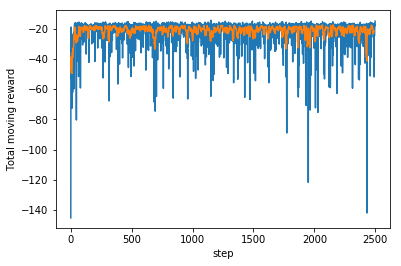

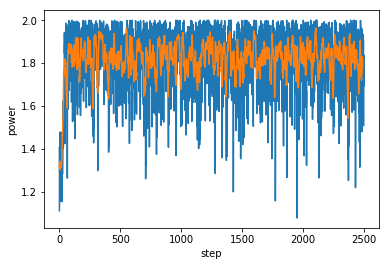

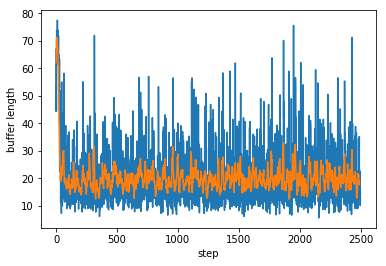

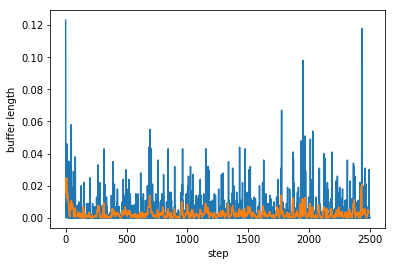

In [3]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

In [1]:
cur_init_ds_ep = env.reset()
    
cur_r_ep = np.zeros(len(user_list))
cur_p_ep = np.zeros(len(user_list))
cur_n_ep = np.zeros(len(user_list))
cur_ts_ep = np.zeros(len(user_list))
cur_rs_ep = np.zeros(len(user_list))
cur_ps_ep = np.zeros(len(user_list))
cur_ds_ep = np.zeros(len(user_list))
cur_ch_ep = np.zeros(len(user_list))
    
for j in range(1000):
    # first try to transmit from current state
    [cur_r, done, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
    cur_r_ep += cur_r
    cur_p_ep += cur_p
    cur_ts_ep += cur_ts
    cur_ps_ep += cur_ps
    cur_rs_ep += cur_rs
    cur_ds_ep += cur_ds
    cur_ch_ep += cur_ch
        
    print('%d:r:%f,p:%s,n:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (j, cur_r, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_init_ds_ep))
        
print('r:%f,p:%s,n:%s,tr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_n_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep))

NameError: name 'env' is not defined

In [3]:
graph = tf.get_default_graph()
inputs = graph.get_tensor_by_name("input_1"+":0")
scaled_out = graph.get_tensor_by_name("output_1"+":0")
print sess.run(scaled_out, feed_dict={inputs: [[7.22254768,2.3384,2.7784888e-05]]})

[[0.78826445 1.        ]]


In [2]:
res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit(False)
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])

0:r:-50.8910,p:1.4033,tr:1.4707,pr:1.3505,rev:2.9594,dbuf:72.5261,ch:0.00002568,ibuf:4
1:r:-57.9454,p:1.3913,tr:1.6529,pr:1.2218,rev:3.0360,dbuf:74.1439,ch:0.00002761,ibuf:30
2:r:-51.0844,p:1.1953,tr:1.5476,pr:1.2320,rev:2.8984,dbuf:73.1955,ch:0.00002990,ibuf:39
3:r:-18.2811,p:1.3469,tr:1.5860,pr:1.3673,rev:2.9762,dbuf:61.5868,ch:0.00002683,ibuf:35
4:r:-17.5547,p:1.2180,tr:1.7657,pr:1.2518,rev:3.0115,dbuf:55.9275,ch:0.00003238,ibuf:63
5:r:-55.6239,p:1.4116,tr:1.4240,pr:1.3390,rev:2.8791,dbuf:69.1011,ch:0.00002492,ibuf:48
6:r:-37.3900,p:1.2706,tr:1.3830,pr:1.5578,rev:3.0240,dbuf:59.5109,ch:0.00002915,ibuf:8
7:r:-32.6223,p:1.4738,tr:1.3452,pr:1.6902,rev:3.0674,dbuf:63.5657,ch:0.00002512,ibuf:71
8:r:-20.8140,p:1.2057,tr:1.4394,pr:1.5456,rev:3.0451,dbuf:49.6221,ch:0.00002902,ibuf:38
9:r:-19.3836,p:1.1973,tr:1.4459,pr:1.4838,rev:2.9358,dbuf:56.0717,ch:0.00002922,ibuf:86


In [3]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

MAX_EPISODE = 50
MAX_EPISODE_LEN = 1000

NUM_T = 1
NUM_R = 1
SIGMA2 = 0.3e-9

config = {'state_dim':3, 'action_dim':2};
train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                 'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                 'random_seed':1234}
user_config = [{'id':'1', 'rate':3, 'dis':100, 'action_bound':1, 
                'data_buf_size':100, 't_factor':0.9, 'penalty':1000}];

print user_config
# 0. initialize the session object
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
    
# 1. include all user in the system according to the user_config
user_list = [];
for info in user_config:
    info.update(config)
    user_list.append(MecTermLD(sess, info, train_config))
    print 'test'

# 2. create the simulation env
env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)
env.init_target_network()

res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])
sess.close()

[{'data_buf_size': 100, 'penalty': 1000, 'rate': 3, 'action_bound': 1, 'id': '1', 't_factor': 0.9, 'dis': 100}]
INFO:tensorflow:Restoring parameters from model/my_test_model
--Return--
None
> <ipython-input-3-a12846566f97>(30)<module>()
     29 graph = tf.get_default_graph()
---> 30 pdb.set_trace()
     31 

ipdb> graph
ipdb> graph.trainable_variables
*** AttributeError: 'Graph' object has no attribute 'trainable_variables'
ipdb> tf.trainable_variables()
[<tf.Variable 'fully_connected/weights:0' shape=(3, 400) dtype=float32_ref>, <tf.Variable 'fully_connected/BatchNorm/beta:0' shape=(400,) dtype=float32_ref>, <tf.Variable 'fully_connected_1/weights:0' shape=(3, 300) dtype=float32_ref>, <tf.Variable 'fully_connected_1/BatchNorm/beta:0' shape=(300,) dtype=float32_ref>, <tf.Variable 'fully_connected_2/weights:0' shape=(300, 2) dtype=float32_ref>, <tf.Variable 'fully_connected_2/biases:0' shape=(2,) dtype=float32_ref>, <tf.Variable 'fully_connected_3/weights:0' shape=(3, 400) dtype=float32

BdbQuit: 

In [9]:
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
variable_names = [v.name for v in tf.trainable_variables()]
values = sess.run(variable_names)
print sess.run('fully_connected_2/weights:0')

INFO:tensorflow:Restoring parameters from model/my_test_model
[[0.1545126  0.15780352]
 [0.15616506 0.15971294]
 [0.06559879 0.09880391]
 [0.06487427 0.10064688]
 [0.15168335 0.16229852]
 [0.06257845 0.09748891]
 [0.06430701 0.09924787]
 [0.06548443 0.10012874]
 [0.15782878 0.15414344]
 [0.15429462 0.17596859]
 [0.05945097 0.0991616 ]
 [0.06383383 0.09632684]
 [0.06522399 0.10438306]
 [0.06095436 0.09916781]
 [0.06635379 0.0955418 ]
 [0.06379106 0.09433711]
 [0.06133086 0.09875894]
 [0.06503102 0.09639146]
 [0.15047684 0.17412661]
 [0.15663381 0.15740666]
 [0.17768952 0.15899988]
 [0.15730077 0.14491995]
 [0.05902164 0.10017106]
 [0.06845198 0.09686822]
 [0.15724926 0.14774598]
 [0.1529071  0.16426612]
 [0.1520101  0.15706535]
 [0.16091335 0.16260217]
 [0.15082897 0.16070077]
 [0.06310375 0.09398151]
 [0.06018374 0.10056869]
 [0.05968894 0.10066012]
 [0.15474424 0.16255529]
 [0.15111688 0.1622602 ]
 [0.0838669  0.18973866]
 [0.06870251 0.24295035]
 [0.06702217 0.10505467]
 [0.1529     

In [3]:
np.save('t_08/1', [1])